In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


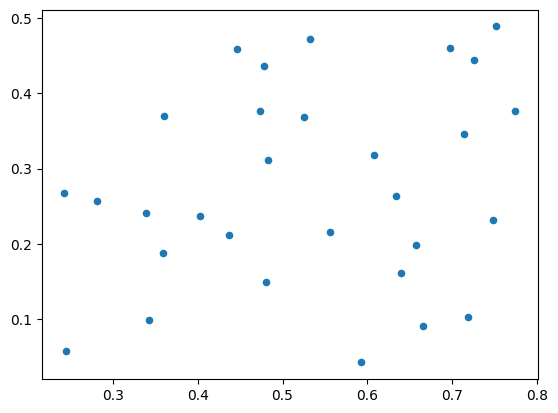

In [2]:
def loaddata():
    data = np.loadtxt('watermelon_4.txt', delimiter=',')
    return data

X = loaddata()
plt.scatter(X[:, 0], X[:, 1], s=20)

In [3]:
# 随机初始化中心点
def kMeansInitCentroids(X, k):
    # 从X的数据中随机取k个作为中心点
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

In [4]:
# 计算数据点到中心点的距离，并判断该数据点所属中心点
def findClosestCentroids(X, centroids):
    # idx中数据表明对应X的数据是属于哪一个中心点的
    idx = np.zeros(len(X)).reshape(X.shape[0], -1)
    
    for i in range(len(X)):
        # 计算当前点到所有中心点的距离
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        # 找到最小距离的索引
        min_index = np.argmin(distances)
        idx[i] = min_index
        
    return idx

In [5]:
# 重新计算中心点位置
def computeCentroids(X, idx):
    k = set(np.ravel(idx).tolist())  # 找到所有聚类中心索引
    k = list(k)
    centroids = np.ndarray((len(k), X.shape[1]))
    
    for i in range(len(k)):
        # 选择数据X中类别为k[i]的数据
        data = X[np.where(idx == k[i])[0]]
        # 重新计算聚类中心
        centroids[i] = np.sum(data, axis=0) / len(data) if len(data) > 0 else X[np.random.randint(len(X))]
        
    return centroids

In [6]:
def k_means(X, k, max_iters):
    initial_centroids = kMeansInitCentroids(X, k)
    centroids = initial_centroids
    
    for _ in range(max_iters):
        # 分配样本到最近的中心点
        idx = findClosestCentroids(X, centroids)
        # 重新计算中心点
        new_centroids = computeCentroids(X, idx)
        
        # 如果中心点不再变化，提前终止
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
    
    # 最终分配
    idx = findClosestCentroids(X, centroids)
    return idx, centroids

In [7]:
# 设置不同的k值和随机种子进行实验
k_values = [2, 3, 4]
seeds = [42, 123, 7]  # 不同的随机种子代表不同的初始中心点

results = []

for k in k_values:
    for seed in seeds:
        np.random.seed(seed)
        idx, centroids = k_means(X, k, 8)
        results.append((k, seed, idx, centroids))
        print(f"k={k}, seed={seed}")
        print("聚类结果:", idx.flatten())
        print("中心点坐标:\n", centroids)
        print("-" * 50)

k=2, seed=42
聚类结果: [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0.]
中心点坐标:
 [[0.62585714 0.37435714]
 [0.44675    0.1875    ]]
--------------------------------------------------
k=2, seed=123
聚类结果: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1.]
中心点坐标:
 [[0.44675    0.1875    ]
 [0.62585714 0.37435714]]
--------------------------------------------------
k=2, seed=7
聚类结果: [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
中心点坐标:
 [[0.6209  0.30825]
 [0.3492  0.2076 ]]
--------------------------------------------------
k=3, seed=42
聚类结果: [2. 2. 1. 2. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 2. 0. 2.
 2. 2. 2. 2. 2. 2.]
中心点坐标:
 [[0.36136364 0.21709091]
 [0.6515     0.16325   ]
 [0.61118182 0.41336364]]
--------------------------------------------------
k=3, seed=123
聚类结果: [1. 1. 0. 1. 0. 2. 0. 2. 0. 2. 2. 2. 0. 0. 2. 0. 0. 2. 2. 2. 0. 1. 1. 1.
 1. 1.

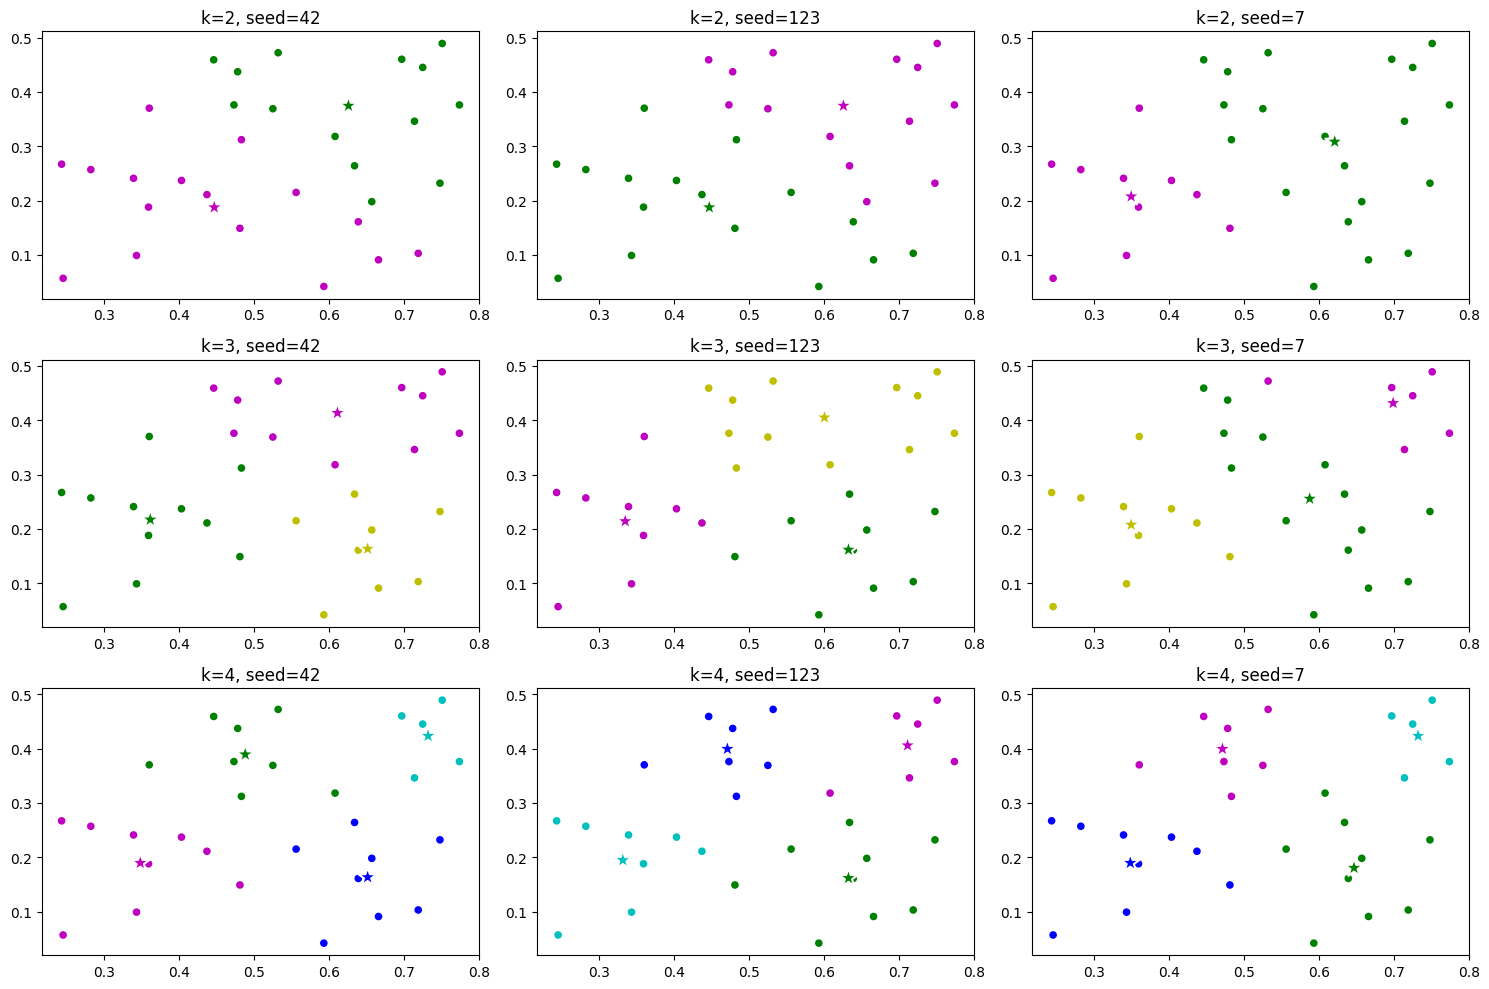

In [8]:
# 可视化结果
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b', 'y', 'c', 'm'])
plt.figure(figsize=(15, 10))

for i, (k, seed, idx, centroids) in enumerate(results):
    plt.subplot(3, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=cm_dark, s=20)
    plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(len(centroids)), 
                cmap=cm_dark, marker='*', s=200, edgecolors='w', linewidths=1.5)
    plt.title(f'k={k}, seed={seed}')
    
plt.tight_layout()
plt.savefig('kmeans_results.png')
plt.show()